In [20]:
from sklearn.metrics import r2_score
from sklearn.linear_model import LinearRegression

import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

import numpy as np
import random

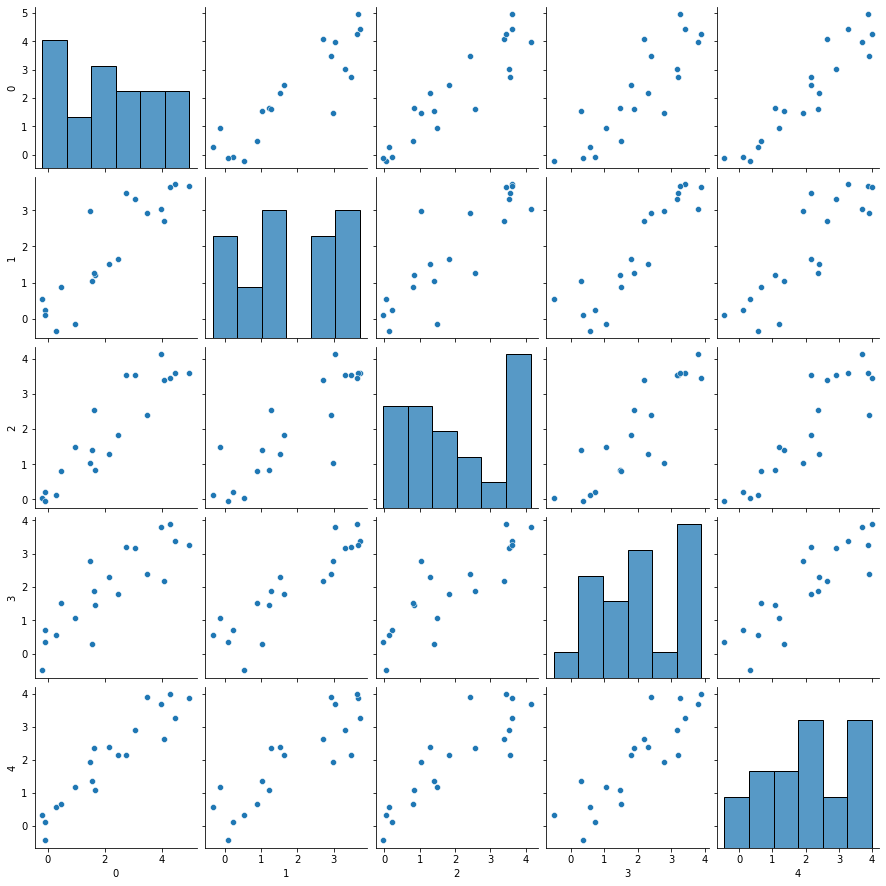

In [27]:
x = np.array(sorted(list(range(5)) * 20)).reshape(20,5) + np.random.normal(size=100, scale=0.5).reshape(20,5)
y = np.array(sorted(list(range(5)) * 20)).reshape(20,5) + np.random.normal(size=100, scale=0.5).reshape(20,5)
sns.pairplot(pd.DataFrame(x))

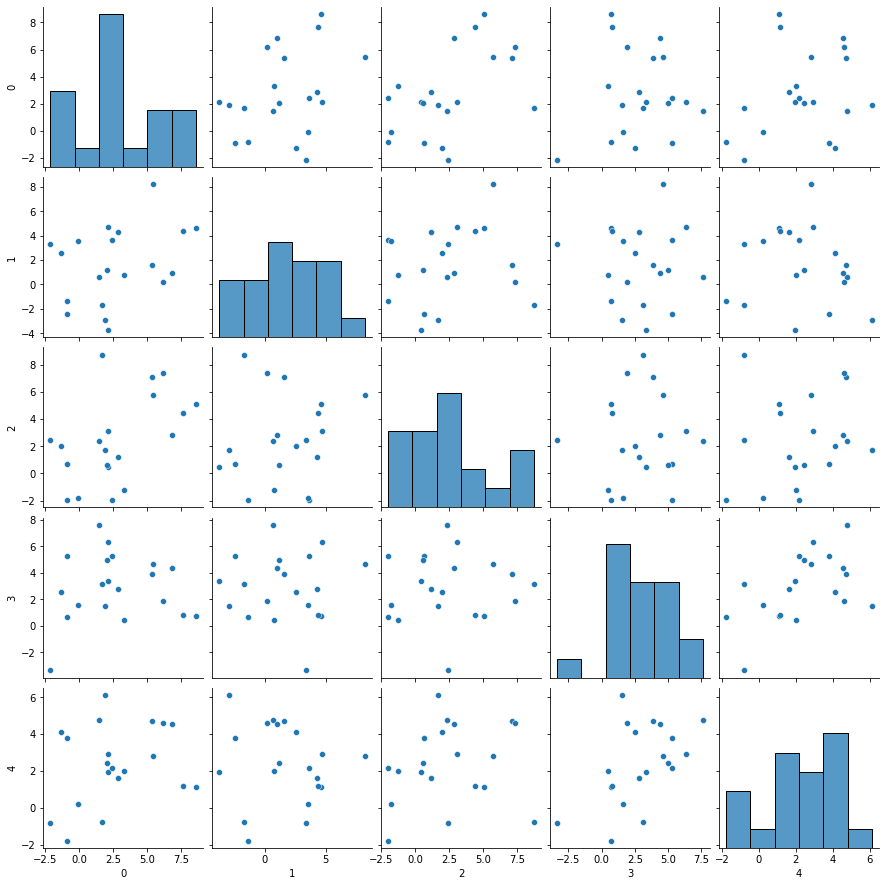

In [29]:
x2 = np.array(sorted(list(range(5)) * 20)).reshape(20,5) + np.random.normal(size=100, scale=2.5).reshape(20,5)
y2 = np.array(sorted(list(range(5)) * 20)).reshape(20,5) + np.random.normal(size=100, scale=0.5).reshape(20,5)
sns.pairplot(pd.DataFrame(x2))

In [60]:
def variance_inflation_factor(x, clf):
    
    vifs = []
    
    for i in range(x.shape[1]):
        sub_x = np.delete(x, i, axis=1)
        sub_y = x[:, i][np.newaxis].T
        
        sub_clf = clf.fit(sub_x, sub_y)
        sub_y_pred = clf.predict(sub_x)
        
        sub_r2 = r2_score(sub_y, sub_y_pred)
        
        vif = 1 / (1-sub_r2)
        vifs.append(vif)
    return vifs
        

In [61]:
model = LinearRegression()
variance_inflation_factor(x, model)

[14.056310582579929,
 7.467530930039597,
 7.431873898436841,
 6.958621774603299,
 10.145131533785447]

In [62]:
model = LinearRegression()
variance_inflation_factor(x2, model)

[1.6132550982763898,
 1.200306854462887,
 1.377535580939459,
 1.3704140520086654,
 1.5495746321295711]